[TESS&RAVDESS] There are 809 training audio files for category:angry
[TESS&RAVDESS] There are 148 testing audio files for category:angry


[TESS&RAVDESS] There are 813 training audio files for category:sad
[TESS&RAVDESS] There are 147 testing audio files for category:sad
[TESS&RAVDESS] There are 586 training audio files for category:neutral
[TESS&RAVDESS] There are 94 testing audio files for category:neutral
[TESS&RAVDESS] There are 514 training audio files for category:ps
[TESS&RAVDESS] There are 78 testing audio files for category:ps
[TESS&RAVDESS] There are 806 training audio files for category:happy
[TESS&RAVDESS] There are 148 testing audio files for category:happy
[+] Generated TESS & RAVDESS DB CSV File
[EMO-DB] Total files to write: 339
[EMO-DB] Training samples: 271
[EMO-DB] Testing samples: 67
[+] Generated EMO-DB CSV File
[+] Data loaded


d:\myPyVenv\myPyVenv\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SVC from version 0.24.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
d:\myPyVenv\myPyVenv\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
d:\myPyVenv\myPyVenv\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
d:\myPyVenv\myPyVenv\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at yo

[+] Best model determined: MLPClassifier with 86.237% test accuracy
              predicted_angry  predicted_sad  predicted_neutral  predicted_ps  \
true_angry          94.827583       0.574713           1.149425      2.298851   
true_sad             3.773585      79.245285           6.918239      3.773585   
true_neutral         0.925926       1.851852          93.518517      1.851852   
true_ps              8.974360       0.000000           3.846154     78.205124   
true_happy           9.146341       1.219512           4.268293      2.439024   

              predicted_happy  
true_angry           1.149425  
true_sad             6.289309  
true_neutral         1.851852  
true_ps              8.974360  
true_happy          82.926826  


100%|██████████| 214/214 [00:17<00:00, 11.94it/s]


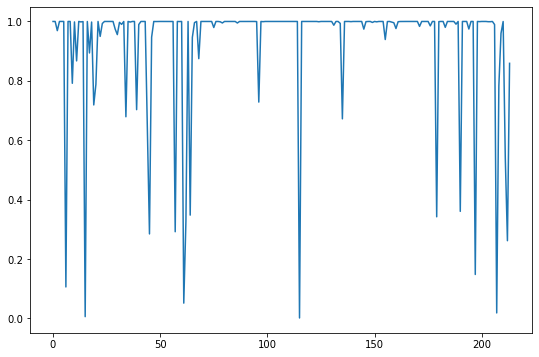

In [25]:
from emotion_recognition import EmotionRecognizer
import os
import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt

class SpeechEmotion():
    def __init__(self):
        self.rec = EmotionRecognizer(emotions=['angry', 'sad', 'neutral', 'ps', 'happy'], balance=False, verbose=1, custom_db=False)

        print(self.rec.confusion_matrix())
        self.data = pd.DataFrame()


    def speechEmotionfile(self, filename):
        dic = self.rec.predict_proba(filename)
        return dic

    def speechEmotionFolder(self, path):
        file_number = []
        emotion_score = []
        for root, dirs, files in os.walk(path):
            for filename in tqdm(list(files)):
                file_number.append(str(datetime.timedelta(seconds=int(filename[:-4])))) # 转为时间之后方便后续按照时间进行聚合
                response = self.speechEmotionfile(filename=os.path.join(root, filename))
                emotion_score.append(response['happy']/(response['happy']+response['sad']))
        self.data['time'] = file_number
        self.data['情感指数'] = emotion_score
        self.data.to_csv(path+'/speech-emotion.csv', index=False, encoding='utf-8')

        self.data['情感指数'].plot(figsize=(9,6))
        plt.show()

a = SpeechEmotion()
a.speechEmotionFolder(path='D:/yuyin')